In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve


In [8]:
data = pd.read_csv(r"C:\Users\deept\OneDrive\Desktop\spam_comments.csv", encoding='latin1')



In [10]:
print("Sample data:")
print(data.head())


Sample data:
                                  comment  label
0      Win a free iPhone now! Click here.      1
1        Great video, thanks for sharing!      0
2  Get rich quick with this simple trick!      1
3     Awesome tutorial, really helped me!      0
4    Visit our website for amazing deals!      1


In [12]:
print("\nChecking for null values:")
print(data.isnull().sum())


Checking for null values:
comment    0
label      0
dtype: int64


In [14]:
data = data.dropna()

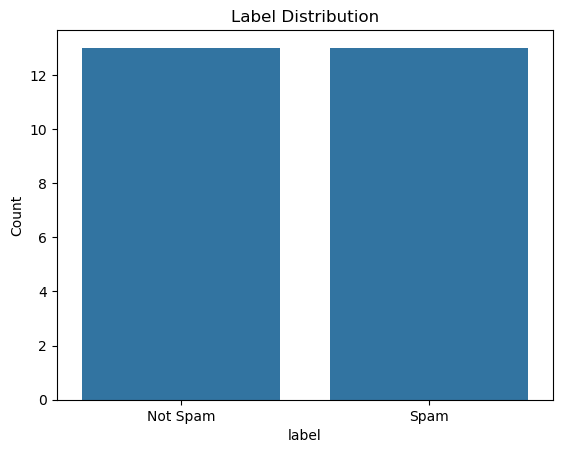

In [16]:
label_counts = data['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']
sns.barplot(x='label', y='count', data=label_counts)
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.title("Label Distribution")
plt.ylabel("Count")
plt.show()

In [18]:
tfidf = TfidfVectorizer(stop_words='english', max_features=2000)
X = tfidf.fit_transform(data['comment'])
y = data['label']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [24]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

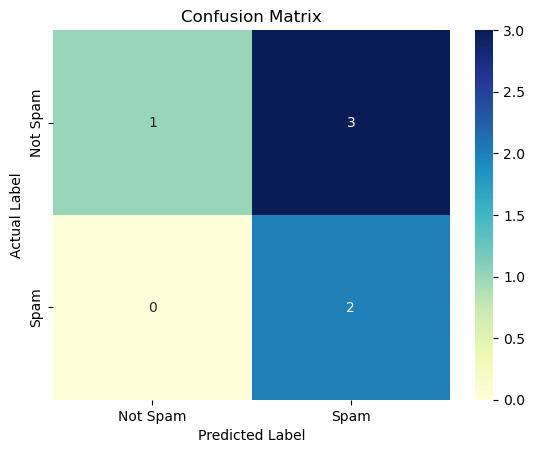

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [28]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Spam", "Spam"]))


Classification Report:
              precision    recall  f1-score   support

    Not Spam       1.00      0.25      0.40         4
        Spam       0.40      1.00      0.57         2

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



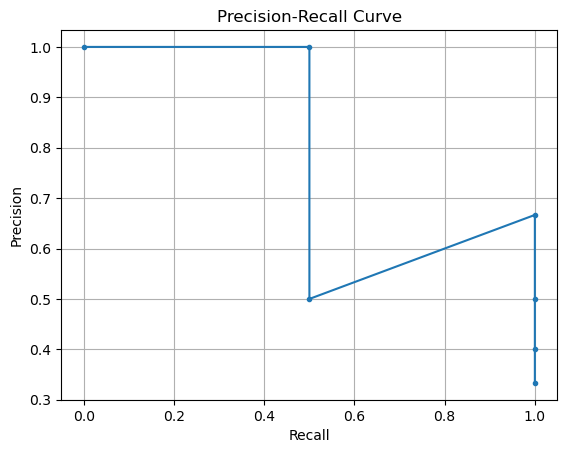

In [30]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

In [32]:
spam_comments = data[data['label'] == 1]['comment']
spam_tokens = " ".join(spam_comments).lower().split()
word_freq = Counter(spam_tokens)
common_words = word_freq.most_common(15)

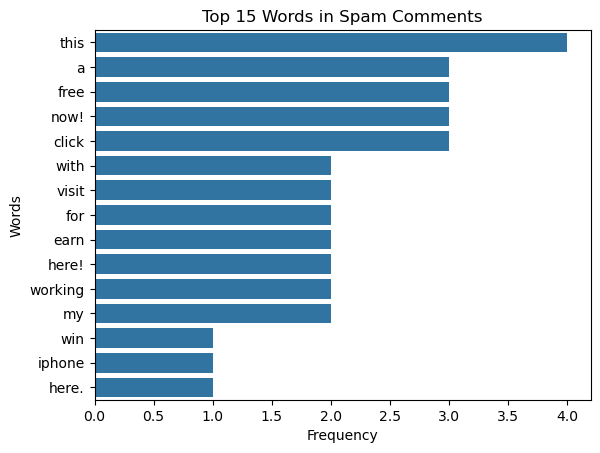

In [34]:
sns.barplot(x=[x[1] for x in common_words], y=[x[0] for x in common_words])
plt.title("Top 15 Words in Spam Comments")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()